# Earnings Based on College Majors

In this project, the data of students who have graduated from different departments of colleges will be processed. 

The columns of the dataset and what information they contain are given below. The dataset is ordered according to the median earnings of the departments.

- `Rank` - Rank by median earnings
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

Using this data, we will try to find answers to the following questions:

- The salary of graduates of which major is higher?
- In which majors are women/men dominant?
- Which majors are more popular?
    
## Importing libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Reading and printing the dataset

In [3]:
recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [4]:
print(recent_grads.head())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  ...  \
0   2057.0    282.0    Engineering    0.120564           36      1976  ...   
1    679.0     77.0    Engineering    0.101852            7       640  ...   
2    725.0    131.0    Engineering    0.153037            3       648  ...   
3   1123.0    135.0    Engineering    0.107313           16       758  ...   
4  21239.0  11021.0    Engineering    0.341631          289     25694  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0  

In [5]:
print(recent_grads.tail())

     Rank  Major_code                   Major   Total     Men   Women  \
168   169        3609                 ZOOLOGY  8409.0  3050.0  5359.0   
169   170        5201  EDUCATIONAL PSYCHOLOGY  2854.0   522.0  2332.0   
170   171        5202     CLINICAL PSYCHOLOGY  2838.0   568.0  2270.0   
171   172        5203   COUNSELING PSYCHOLOGY  4626.0   931.0  3695.0   
172   173        3501         LIBRARY SCIENCE  1098.0   134.0   964.0   

               Major_category  ShareWomen  Sample_size  Employed  ...  \
168    Biology & Life Science    0.637293           47      6259  ...   
169  Psychology & Social Work    0.817099            7      2125  ...   
170  Psychology & Social Work    0.799859           13      2101  ...   
171  Psychology & Social Work    0.798746           21      3777  ...   
172                 Education    0.877960            2       742  ...   

     Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
168       2190                  3602       

## Removing rows with missing values

In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In `Total`, `Men`, `Women` and `ShareWomen` columns, there is only one missing data. The rows with missing data have to removed.

In [7]:
recent_grads = recent_grads.dropna()

In [8]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


All missing values are in the same row because when we remove the rows with missing values, only one row was removed in total. The number of rows has dropped from 173 to 172.

## Scatter plots

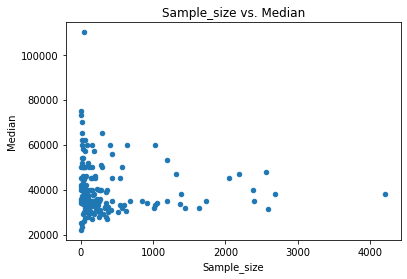

In [9]:
recent_grads.plot(x="Sample_size", y="Median", kind="scatter",
                 title="Sample_size vs. Median")

There is not corelation between popularity of major and salary.

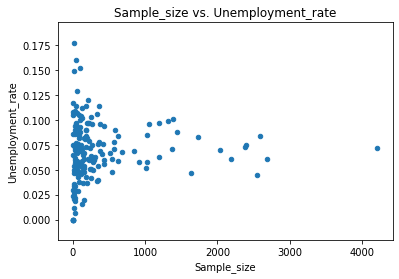

In [10]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter",
                 title="Sample_size vs. Unemployment_rate")

There is not correlation between popularity of major and unemployment rate.

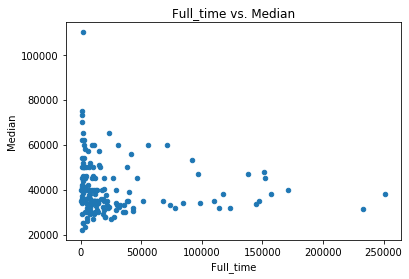

In [11]:
recent_grads.plot(x="Full_time", y="Median", kind="scatter",
                 title="Full_time vs. Median")

There is not correlation between popularity of major and unemployment rate.

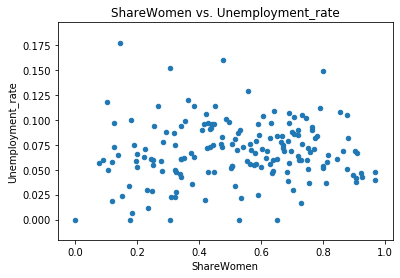

In [12]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter",
                 title="ShareWomen vs. Unemployment_rate")

Unemployment and female rate are slightly correlated.

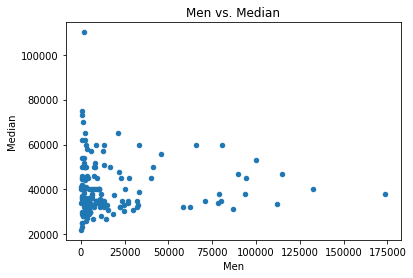

In [13]:
recent_grads.plot(x="Men", y="Median", kind="scatter",
                 title="Men vs. Median")

There is not correlation between number of male graduates and salary.

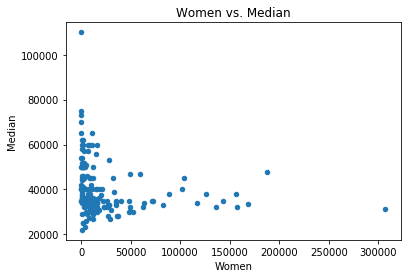

In [14]:
recent_grads.plot(x="Women", y="Median", kind="scatter",
                 title="Women vs. Median")

There is not correlation between number of female graduates and salary.

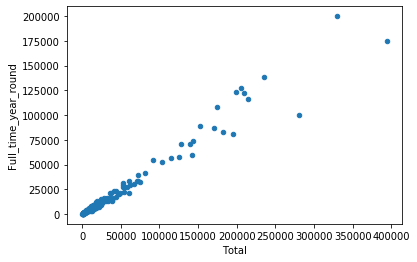

In [40]:
recent_grads.plot(x="Total", y="Full_time_year_round", kind="scatter")

Finally we found two parameters with a strong correlation. x-axis is the total number of graduates, y-axis is the number of students who got full time job, year round

## Histograms

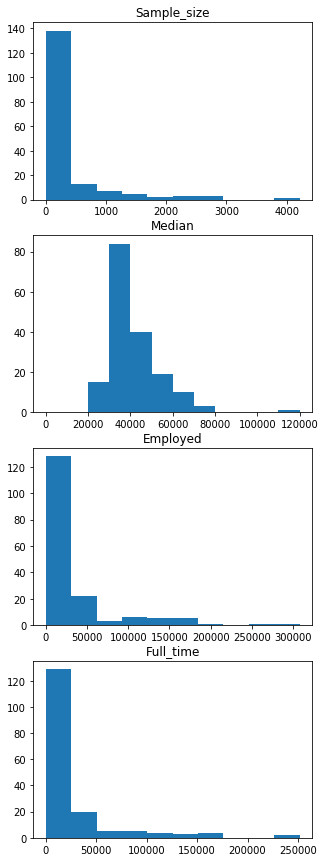

In [15]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", 
        "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,15))
for n in range(0,4):
    fig.add_subplot(4,1,n+1)
    if n==1:        
        ax = recent_grads[cols[n]].hist(grid=False, bins=12, range=(0,120000))
        ax.set_title(cols[n])
    else: 
        ax = recent_grads[cols[n]].hist(grid=False)
        ax.set_title(cols[n])

In the first plot, the number of majors with a low sample size is higher. This is expected because there are many minor majors with few students.

In the second plot, grads are the most intense between 30k-40k per year.

The third and fourth plot is similar to the first plot  because of similar reasons. 

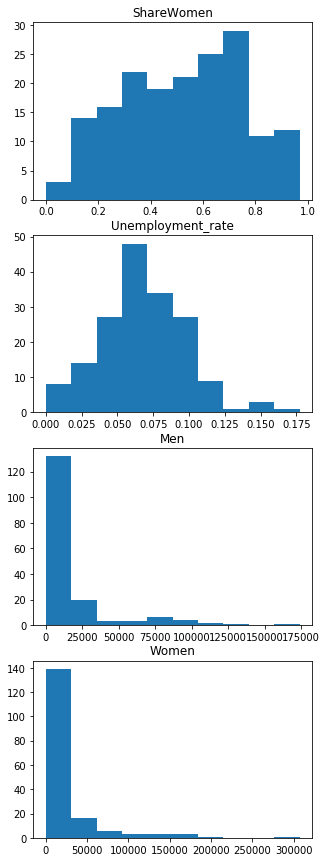

In [16]:
fig = plt.figure(figsize=(5,15))
for n in range(4,8):
    fig.add_subplot(4,1,n-3)
    ax = recent_grads[cols[n]].hist(grid=False)
    ax.set_title(cols[n])

In the first plot, there are fewer majors where women are dominant or rare. Majors with a female ratio of 60-80% are the most intense.

In the second plot, the number of majors with a very high or low unemployment rate is low.

The third and fourth plots are similar because the number of small sections is much higher than the large sections.

## Scatter matrix plots 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5481AD748>,
      dtype=object)

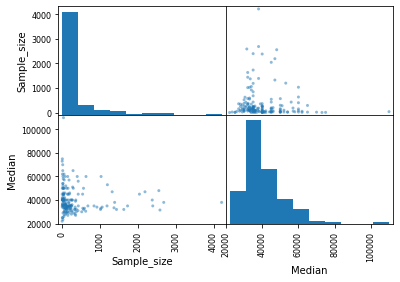

In [17]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[["Sample_size", "Median"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C54851DB08>,
      dtype=object)

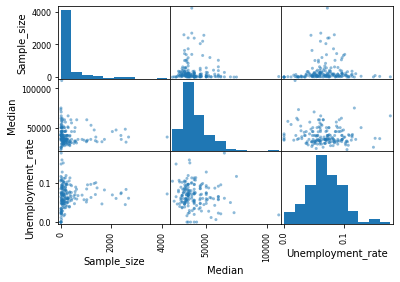

In [18]:
scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C54837D488>,
      dtype=object)

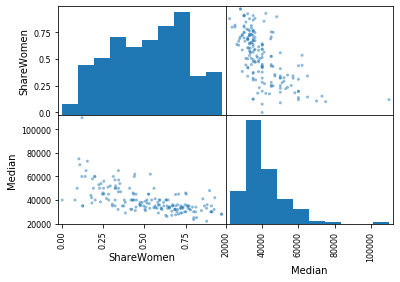

In [19]:
scatter_matrix(recent_grads[["ShareWomen", "Median"]])

There is a negative correlation between the rate of women and salary. As the rate of women increases, the salary decreases and vice versa.

## Bar plots

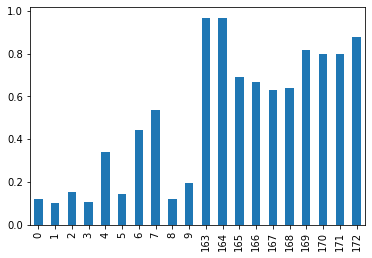

In [32]:
pd.concat([recent_grads["ShareWomen"].head(10), recent_grads["ShareWomen"].tail(10)], axis=0).plot(kind="bar")

The rate of women is higher in majors with a lower median salary. It can be deduced that there is gender inequality in the business world.

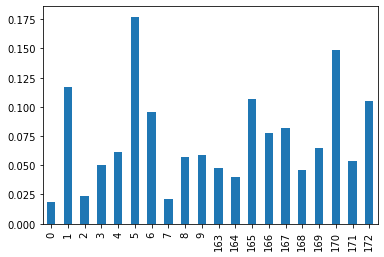

In [36]:
pd.concat([recent_grads["Unemployment_rate"].head(10), recent_grads["Unemployment_rate"].tail(10)]).plot(kind="bar")

There is no correlation between occupations with the highest and lowest salaries and unemployment.